In [1]:
print("hello world")

hello world


In [2]:
# Import libraries

import altair as alt

In [3]:
%run analyzeData.ipynb

[0] : 2 csv files detected for <climateKnowledge> directory:
  [0] : pr_1901_2016_USA.csv
  [1] : tas_1901_2016_USA.csv

[1] : 8 csv files detected for <emission> directory:
  [0] : emission_agriculture.csv
  [1] : emission_all_gases.csv
  [2] : emission_all_sectors.csv
  [3] : emission_commercial.csv
  [4] : emission_electricity_generation.csv
  [5] : emission_industry.csv
  [6] : emission_residential.csv
  [7] : emission_transport.csv

[2] : 3 csv files detected for <epa> directory:
  [0] : ghg-concentrations.csv
  [1] : sea-level.csv
  [2] : snow-cover.csv

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 136 non-null    int64  
 1   CSIRO - Adjusted sea level (inches)  134 non-null    float64
 2   CSIRO - Lower error bound (inches)   134 non-null    float64

In [4]:
df = MAIN_GRID[1][2]

# Get row
df.loc[df['Economic Sector'] == 'Agriculture']

# Get column
df['1990']

0    1527.071188
1    1875.593659
2    1628.676867
3     598.967218
4     428.668347
5     344.701666
6      33.321186
7    6437.000131
Name: 1990, dtype: float64

In [5]:
#Temperature Anamodf_merged_final - OMIT
df_merged_final

alt.Chart(df_merged_final).mark_bar().encode(
    alt.X('Year_Merge:O', scale=alt.Scale(zero=False)),
    alt.Y('Anamoly_TmpCls:Q', scale=alt.Scale(zero=False, padding=1)),
    color='MLHawai_CO2ppm:Q',
    #size='MLHawai_CO2ppm:Q'
)


alt.Chart(...)

In [166]:
# Mean annual Temperature + Anamoly for 57 years
import altair as alt
from vega_datasets import data

domain = [3,10]
range_ = ['blue', 'green']

chart1 = alt.Chart(df_merged_final).mark_bar().encode(
    x=alt.X('Year_Merge:O', title='Year'),
    y=alt.Y('Tmp_Cls:Q', title='Temperature in Celcius'),
    #color='Tmp_Cls:Q'
    color=alt.Color('Tmp_Cls:Q', scale=alt.Scale(domain=domain, range=range_))
   
).properties(
    height=300,
    width=700
)


chart2 = alt.Chart(df_merged_final).encode(
    x=alt.X('Year_Merge:O', title='Year'),
    y=alt.Y('Anamoly_TmpCls:Q', title='Temperature in Celcius'),
    
).properties(
    height=300,
    width=700
)

alt.layer(chart1.mark_bar(),chart2.mark_rule(color='orange'),title='Mean Annual Temperature + Anomaly (USA)')

alt.LayerChart(...)

In [7]:
#Precipitation Anamoly for 57 years - OMIT
df_merged_final

alt.Chart(df_merged_final).mark_bar().encode(
    alt.X('Year_Merge:O', scale=alt.Scale(zero=False)),
    alt.Y('Anamoly_RnfMM:Q', scale=alt.Scale(zero=False, padding=1)),
    color='MLHawai_CO2ppm:Q',
    #size='MLHawai_CO2ppm:Q'
)

alt.Chart(...)

In [99]:
# Mean Annual Precipitation + Anamoly for 57 years
import altair as alt
from vega_datasets import data


chart1 = alt.Chart(df_merged_final).encode(
    x=alt.X('Year_Merge:O', title='Year'),
    y=alt.Y('Rnf_MM:Q', title='Rainfall in MM'),
    color='Rnf_MM:Q'
).properties(
    height=300,
    width=700
)

chart2 = alt.Chart(df_merged_final).encode(
    x=alt.X('Year_Merge:O', title='Year'),
    y=alt.Y('Anamoly_RnfMM:Q', title='Rainfall in MM'),

).properties(
    height=300,
    width=700
)

alt.layer(chart1.mark_bar(),chart2.mark_rule(color='orange'),title='Mean Annual Precipitation + Anomaly (USA)')

alt.LayerChart(...)

In [9]:
#Sea level rise Anamoly for 57 - OMIT
df_merged_final

alt.Chart(df_merged_final).mark_bar().encode(
    alt.X('Year_Merge:O', scale=alt.Scale(zero=False)),
    alt.Y('Anamoly_CSIRO_ASLinches:Q', scale=alt.Scale(zero=False, padding=1)),
    color='MLHawai_CO2ppm:Q',
    #size='Anamoly_CSIRO_ASLinches:Q'
)

alt.Chart(...)

In [109]:
#Sea level rise + Anamoly for 57 years
import altair as alt
from vega_datasets import data


chart1 = alt.Chart(df_merged_final).encode(
    x=alt.X('Year_Merge:O', title='Year'),
    y=alt.Y('CSIRO_ASLinches:Q', title='Adjusted Sea Level Rise in Inches'),
    color='CSIRO_ASLinches:Q'
).properties(
    height=300,
    width=700
)

chart2 = alt.Chart(df_merged_final).encode(
   x=alt.X('Year_Merge:O', title='Year'),
    y=alt.Y('Anamoly_CSIRO_ASLinches:Q', title='Adjusted Sea Level Rise in Inches'),
).properties(
    height=300,
    width=700
)

alt.layer(chart1.mark_bar(),chart2.mark_rule(color='orange'),title='Annual Sea Level Rise + Anomaly (Global)')


alt.LayerChart(...)

In [11]:
# histogram plot #Normality Check - OMIT
import pandas as pd
import altair as alt
import numpy as np

alt.Chart(df1_filter).mark_bar().encode(
    alt.X( "Rnf_MM:Q",
          bin= True), #alt.BinParams(maxbins=100)
    y='count(*):Q'
)

alt.Chart(...)

In [12]:
#Scatter Plot # Distribution
import altair as alt
from vega_datasets import data

alt.Chart(df_merged_final).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='Year_Merge:O'
).properties(
    width=200,
    height=200
).repeat(
    column=['Rnf_MM','Tmp_Cls','CSIRO_ASLinches','MLHawai_CO2ppm'],
    row=['MLHawai_CO2ppm','CSIRO_ASLinches','Tmp_Cls','Rnf_MM']
)

alt.RepeatChart(...)

In [13]:
#Scatter Plot # Distribution - OMIT

import altair as alt
from vega_datasets import data

alt.Chart(df_merged_final).mark_circle().encode(
    alt.X('Year_Merge:O', scale=alt.Scale(zero=False)),
    alt.Y('Tmp_Cls:Q', scale=alt.Scale(zero=False, padding=1)),
    color='Anamoly_TmpCls:Q',
    size='MLHawai_CO2ppm:Q'
)


alt.Chart(...)

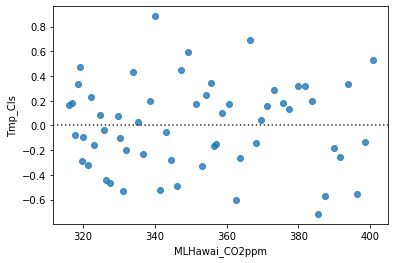

In [14]:
#residuals scatterplot to check Homoscedasticity of the attributes. 
#Note-!!!Couldn't figure out in Altair so used seaborn, and matplotlib. - OMIT
import seaborn as sns 
import matplotlib.pyplot as plt 
  
# draw residplot 
sns.residplot(x = "MLHawai_CO2ppm", 
              y = "Tmp_Cls", 
              data = df_merged_final) 
  
# show the plot 
plt.show() 

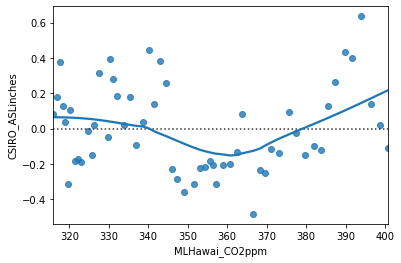

In [15]:
#residuals scatterplot to check Homoscedasticity of the attributes.
#Note-!!! Couldn't figure out in Altair so used seaborn, and matplotlib. - OMIT

import seaborn as sns 
import matplotlib.pyplot as plt 
  
# draw residplot 
# with lowess = True 
sns.residplot(x = "MLHawai_CO2ppm", 
              y = "CSIRO_ASLinches", 
              data = df_merged_final, 
              lowess = True) 
  
# show the plot 
plt.show() 


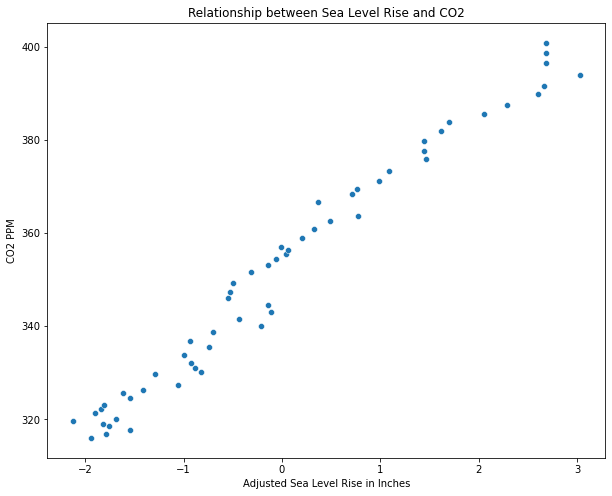

In [117]:
#Scatter plot with seaborn to check the correlations - ZOOM INTO IT

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
ax = sns.scatterplot(x="Anamoly_CSIRO_ASLinches",y="MLHawai_CO2ppm", data=df_merged_final)

ax.set(xlabel='Adjusted Sea Level Rise in Inches', ylabel='CO2 PPM')
ax.set_title('Relationship between Sea Level Rise and CO2')
plt.show()

In [169]:
#sea level visualization

import altair as alt

df_sealevel=MAIN_GRID[2][1]

sealevel_chart=alt.Chart(df_sealevel).mark_line().encode(
      x='Year:Q',
      y=alt.Y('CSIRO - Adjusted sea level (inches):Q', title='Adjusted Sea Level Rise in Inches'),
  )


Regline= sealevel_chart.transform_regression('Year', 'CSIRO - Adjusted sea level (inches)',method="linear"
).mark_line(color="red")

alt.layer(Regline, sealevel_chart, title='Annual Sea Level Rise').properties(width=700)



alt.LayerChart(...)

In [138]:
#snow cover visualization

import altair as alt

df_snow_cover=MAIN_GRID[2][2]

snow_chart=alt.Chart(df_snow_cover).mark_line().encode(
      x='Year:Q',
      y=alt.Y('Average mi^2:Q', scale=alt.Scale(domain=(3000000, 3700000)))
  )

Regline= snow_chart.transform_regression('Year', 'Average mi^2',method="linear"
).mark_line(color="red")

alt.layer(Regline, snow_chart, title='Snow Cover Levels').properties(height=400, width=700)

alt.LayerChart(...)

In [152]:
#GHG chart - adding the regline seems to crash the visualization, not sure why
import altair as alt

df_ghg=MAIN_GRID[2][0]

ghg_chart=alt.Chart(df_ghg).mark_line().encode(
       x=alt.X('Year (negative values = BC):Q', title='Year', scale=alt.Scale(domain=(1959, 2020))),
       y=alt.Y('Mauna Loa, Hawaii:Q', title='CO2 PPM', scale=alt.Scale(domain=(300, 420)))
).properties(
    title='CO2 Levels in PPM'
)

# Regline= ghg_chart.transform_regression('Year (negative values = BC)', 'Mauna Loa, Hawaii',method="linear"
# ).mark_line(color="red")

# alt.layer(Regline, ghg_chart).properties(height=400, width=700)

ghg_chart.properties(width=700)

alt.Chart(...)